In [1]:
%display latex

In [2]:
var('r L')
V(r,L) = - 1/r + L^2/(2*r^2) - L^2/r^3
V(r,L)

1/2*L^2/r^2 - L^2/r^3 - 1/r

In [3]:
l_values = [0, 2, 3.0, 2*sqrt(3), 3.8, 4.2, 4.6, 5.0]

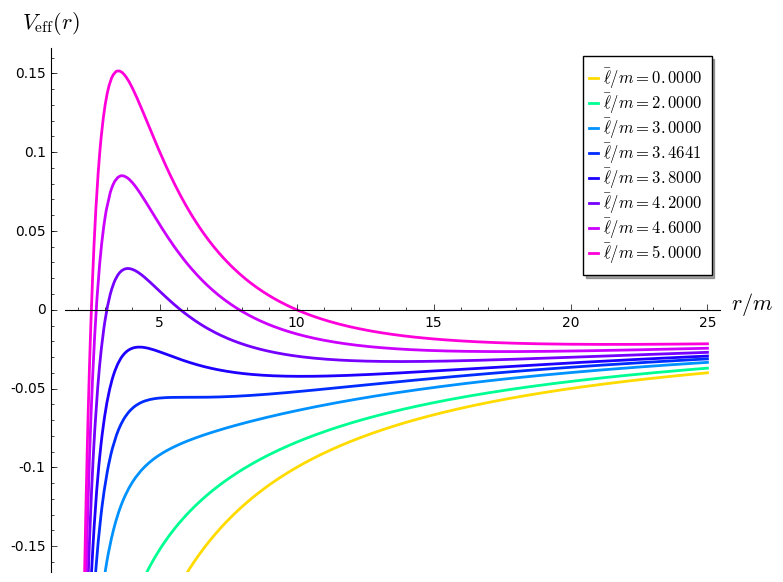

In [4]:
graph = Graphics()
for l in l_values:
    graph += plot(V(r,l), (r, 2, 25), plot_points=300, 
                  legend_label="$\\bar\\ell/m = {:.4f}$".format(float(l)),
                  color=hue((1+l)/7), thickness=2,
                  xmin=0, xmax=25, ymin=-0.16, ymax=0.16,
                  axes_labels=[r'$r/m$', r'$V_{\rm eff}(r)$'])
graph

In [5]:
V(2,L)

-1/2

In [6]:
diff(V(r,L),r)

-L^2/r^3 + 3*L^2/r^4 + 1/r^2

In [7]:
s = solve(diff(V(r,L),r)==0, r)
s

[r == 1/2*L^2 - 1/2*sqrt(L^2 - 12)*L, r == 1/2*L^2 + 1/2*sqrt(L^2 - 12)*L]

In [8]:
for l in l_values:
    r1 = s[0].subs(L=l).rhs()
    r2 = s[1].subs(L=l).rhs()
    print("l={}: r1={}, r2={}".format(l, r1, r2))

l=0: r1=0, r2=0
l=2: r1=-2*sqrt(-2) + 2, r2=2*sqrt(-2) + 2
l=3.00000000000000: r1=4.50000000000000 - 2.59807621135332*I, r2=4.50000000000000 + 2.59807621135332*I
l=2*sqrt(3): r1=6, r2=6
l=3.80000000000000: r1=4.25210512315547, r2=10.1878948768445
l=4.20000000000000: r1=3.83277632344408, r2=13.8072236765559
l=4.60000000000000: r1=3.61893686280608, r2=17.5410631371939
l=5.00000000000000: r1=3.48612181134003, r2=21.5138781886600


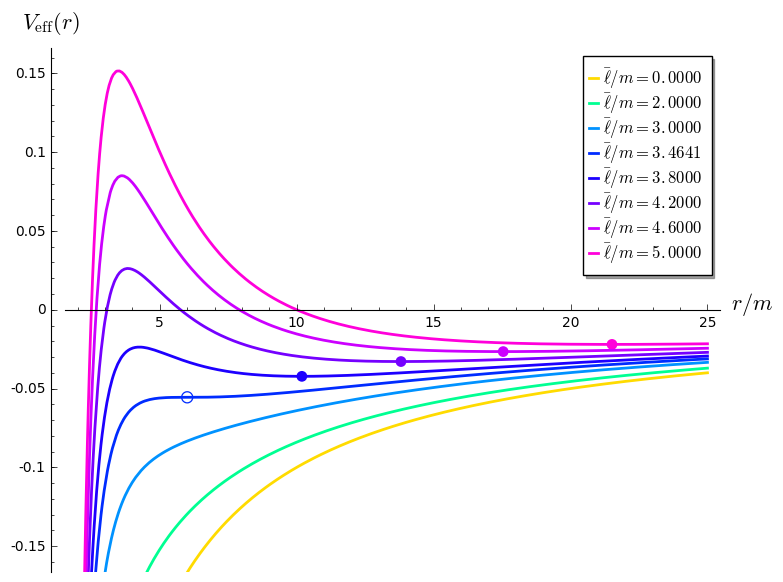

In [9]:
for l in l_values:
    if l>=2*sqrt(3):
        r2 = s[1].subs(L=l).rhs()
        V2 = V(r2,l)
        if l== 2*sqrt(3):
            graph += point((r2,V2), color=hue((1+l)/7), size=80, 
                           marker=r'$\circ$')
        else:
            graph += point((r2,V2), color=hue((1+l)/7), size=60)
graph

In [10]:
graph.save("ges_eff_pot_timelike.pdf")